# Call Debit Spread API Endpoint Documentation

### Overview
The Call Debit Spread API endpoint allows quant developers to easily retrieve data on call debit spreads for specified tickers. This documentation guides you through how to use the endpoint, including how to pass parameters, make API calls, and handle the response. This service is ideal for those interested in trading options with a specific risk-reward ratio.


### Required Components
To use this API endpoint, you need the following:
- **API Key**: Your API key (`MOSAIC_API_KEY`) is required to authenticate the request.
- **Environment Setup**: Use `.env` files to securely store your API key and keep sensitive data away from your code.


In [ ]:
import requests 
import pandas as pd 
import os 
from dotenv import load_dotenv 
import urllib

load_dotenv()


params = {
    "ticker": "SPY", # The ticker symbol for the underlying asset (e.g., `SPY`). 
    "min_dte": 20, # Minimum days to expiration. Defines a lower bound on `dte`. 
    "max_dte": 50, # Maximum days to expiration. Defines an upper bound on `dte`.
    'max_strike':620 # The highest you think the stock price will go
}

# Convert dictionary to URL-encoded string
query_string = urllib.parse.urlencode(params)

url = f"https://uum5c9uvjt.us-east-1.awsapprunner.com/call_options/debit_spread?{query_string}&apikey={os.environ['MOSAIC_API_KEY']}"

res = requests.get(url)

df = pd.read_json(res.json()['data'],orient='split')

In [37]:
df[['underlying_ticker','bottom_leg_occ','occ','stock_price','expiration_date','dte','distance_to_max_profit','moic']].head(10)

,underlying_ticker,bottom_leg_occ,occ,stock_price,expiration_date,dte,distance_to_max_profit,moic
0,SPY,SPY241220C00619000,SPY241220C00620000,598.83,2024-12-20,21,0.034742,11.764706
1,SPY,SPY241220C00618000,SPY241220C00619000,598.83,2024-12-20,21,0.033128,10.526316
2,SPY,SPY241227C00619000,SPY241227C00620000,598.83,2024-12-27,28,0.034742,9.523810
3,SPY,SPY241231C00619000,SPY241231C00620000,598.83,2024-12-31,32,0.034742,8.333333
4,SPY,SPY241227C00618000,SPY241227C00619000,598.83,2024-12-27,28,0.033128,8.333333
5,SPY,SPY241220C00617000,SPY241220C00618000,598.83,2024-12-20,21,0.031511,8.333333
6,SPY,SPY241231C00618000,SPY241231C00619000,598.83,2024-12-31,32,0.033128,7.692308
7,SPY,SPY241220C00616000,SPY241220C00617000,598.83,2024-12-20,21,0.029891,7.692308
8,SPY,SPY241227C00617000,SPY241227C00618000,598.83,2024-12-27,28,0.031511,7.407407
9,SPY,SPY250103C00619000,SPY250103C00620000,598.83,2025-01-03,35,0.034742,7.142857


### Response Data
The response from the endpoint is provided in split JSON format, which can be easily converted into a pandas DataFrame. The DataFrame will contain various fields, including:

- **`underlying_ticker`**: The ticker symbol for the underlying asset (e.g., `SPY`).
- **`bottom_leg_occ`**: Option Clearing Corporation (OCC) code for the lower leg of the spread.
- **`occ`**: OCC code for the call debit spread.
- **`expiration_date`**: The expiration date of the spread option.
- **`dte`**: Days to expiration.
- **`distance_to_max_profit`**: How far the spread is from achieving maximum profit.
- **`moic`**: Multiple on Invested Capital. Represents the potential return multiple (e.g., an `moic` of 11 implies an 11x return on your initial investment).


- **MOIC (Multiple on Invested Capital)**: This metric helps quantify the potential returns on the invested capital.
  - For example, a `MOIC` of 11 means that if you invest $100, the profit could potentially be $1,100.
- Trades that are **further out of the money** tend to have **higher expected profit** but come with a **lower likelihood of profit**.
- **Expiration dates** further into the future tend to yield **lower expected profit** since you pay a premium for the additional time.



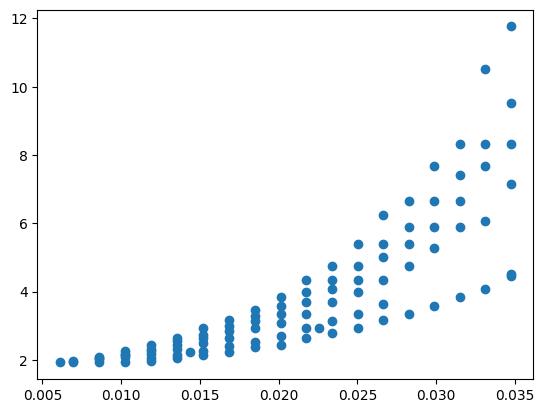

In [43]:
import matplotlib.pyplot as plt
import plotly.express as px

# Further out the money trades have higher expected profit, as the likelihood is lower

plt.scatter(df['distance_to_max_profit'], df['moic'])

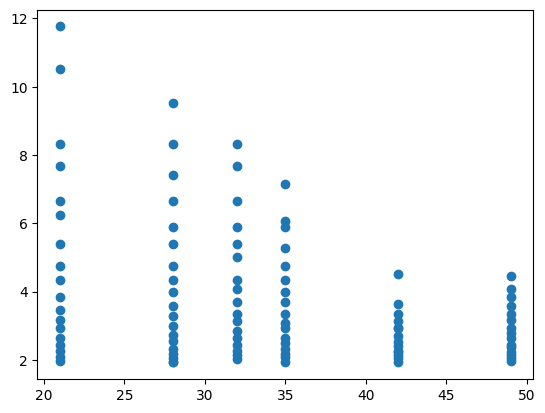

In [44]:
# Expiration dates further in the future tend to have lower expected profit. 
# You are paying a premium for time
plt.scatter(df['dte'], df['moic'])

In [59]:
fig = px.scatter_3d(df[['dte','distance_to_max_profit','moic']], x="dte", y="distance_to_max_profit",z='moic',color='moic')
fig.show()

### Summary
The Call Debit Spread API endpoint is a powerful tool for quant developers to assess potential call debit spread trades based on certain conditions like `ticker`, `days to expiration`, and `maximum strike price`. Utilizing the endpoint helps you make data-driven decisions when evaluating different debit spread opportunities, especially focusing on risk-reward metrics such as MOIC.


In the above data:
- A `moic` of `11` means you stand to make 11 times your initial investment if the underlying reaches the desired level before expiration.
- **`distance_to_max_profit`** indicates how far the stock price is from hitting the maximum profit potential.

### Recommendations
- **Adjust Parameters**: Try different `min_dte`, `max_dte`, and `max_strike` values to find the most suitable debit spread trades based on your risk preferences.
- **Interpret Results**: Focus on the `moic` metric to identify trades with higher potential profit, keeping in mind the risk associated.